# Исследование объявлений о продаже квартир

### Описание проекта

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Представленны в (файл real_estate.csv).

*ЗАДАЧА*  
Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Как они влияют на стоимость объектов.

*ЦЕЛЬ ПРОЕКТА*

Выяснить какие основные параметры и факторы оказывают влияния на стоимость объекта недвижимости.

*ШАГИ ПРОЕКТА*
 1. Обзор данных.
 2. Предобработка данных.
 3. Добавление новых столбцов.
 4. Исследовательский анализ данных
 5. Общий вывод


# Шаг 1. Обзор данных

### 1.1 Откройте файл с данными и изучите общую информацию. 

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

Чтобы избавиться от вывода предупреждений, нужно добавить эти две строчки.
import warnings
warnings.simplefilter("ignore")

In [3]:
import warnings
warnings.simplefilter("ignore")

### 1.2 Прочитаем csv файл, указав в качестве разделителя '\t' и сохраним его в переменной df. Выведем первые 10 строк датафрэйма.

In [4]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
    pd.set_option('display.max_columns', None)
except:
     df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)        
df.head(10)



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем основную информацию о датафрейме с помощью метода info().

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot: title={'center': 'total_images'}>,
        <AxesSubplot: title={'center': 'last_price'}>,
        <AxesSubplot: title={'center': 'total_area'}>,
        <AxesSubplot: title={'center': 'rooms'}>],
       [<AxesSubplot: title={'center': 'ceiling_height'}>,
        <AxesSubplot: title={'center': 'floors_total'}>,
        <AxesSubplot: title={'center': 'living_area'}>,
        <AxesSubplot: title={'center': 'floor'}>],
       [<AxesSubplot: title={'center': 'kitchen_area'}>,
        <AxesSubplot: title={'center': 'balcony'}>,
        <AxesSubplot: title={'center': 'airports_nearest'}>,
        <AxesSubplot: title={'center': 'cityCenters_nearest'}>],
       [<AxesSubplot: title={'center': 'parks_around3000'}>,
        <AxesSubplot: title={'center': 'parks_nearest'}>,
        <AxesSubplot: title={'center': 'ponds_around3000'}>,
        <AxesSubplot: title={'center': 'ponds_nearest'}>],
       [<AxesSubplot: title={'center': 'days_exposition'}>,
        <AxesSubplot: >, 

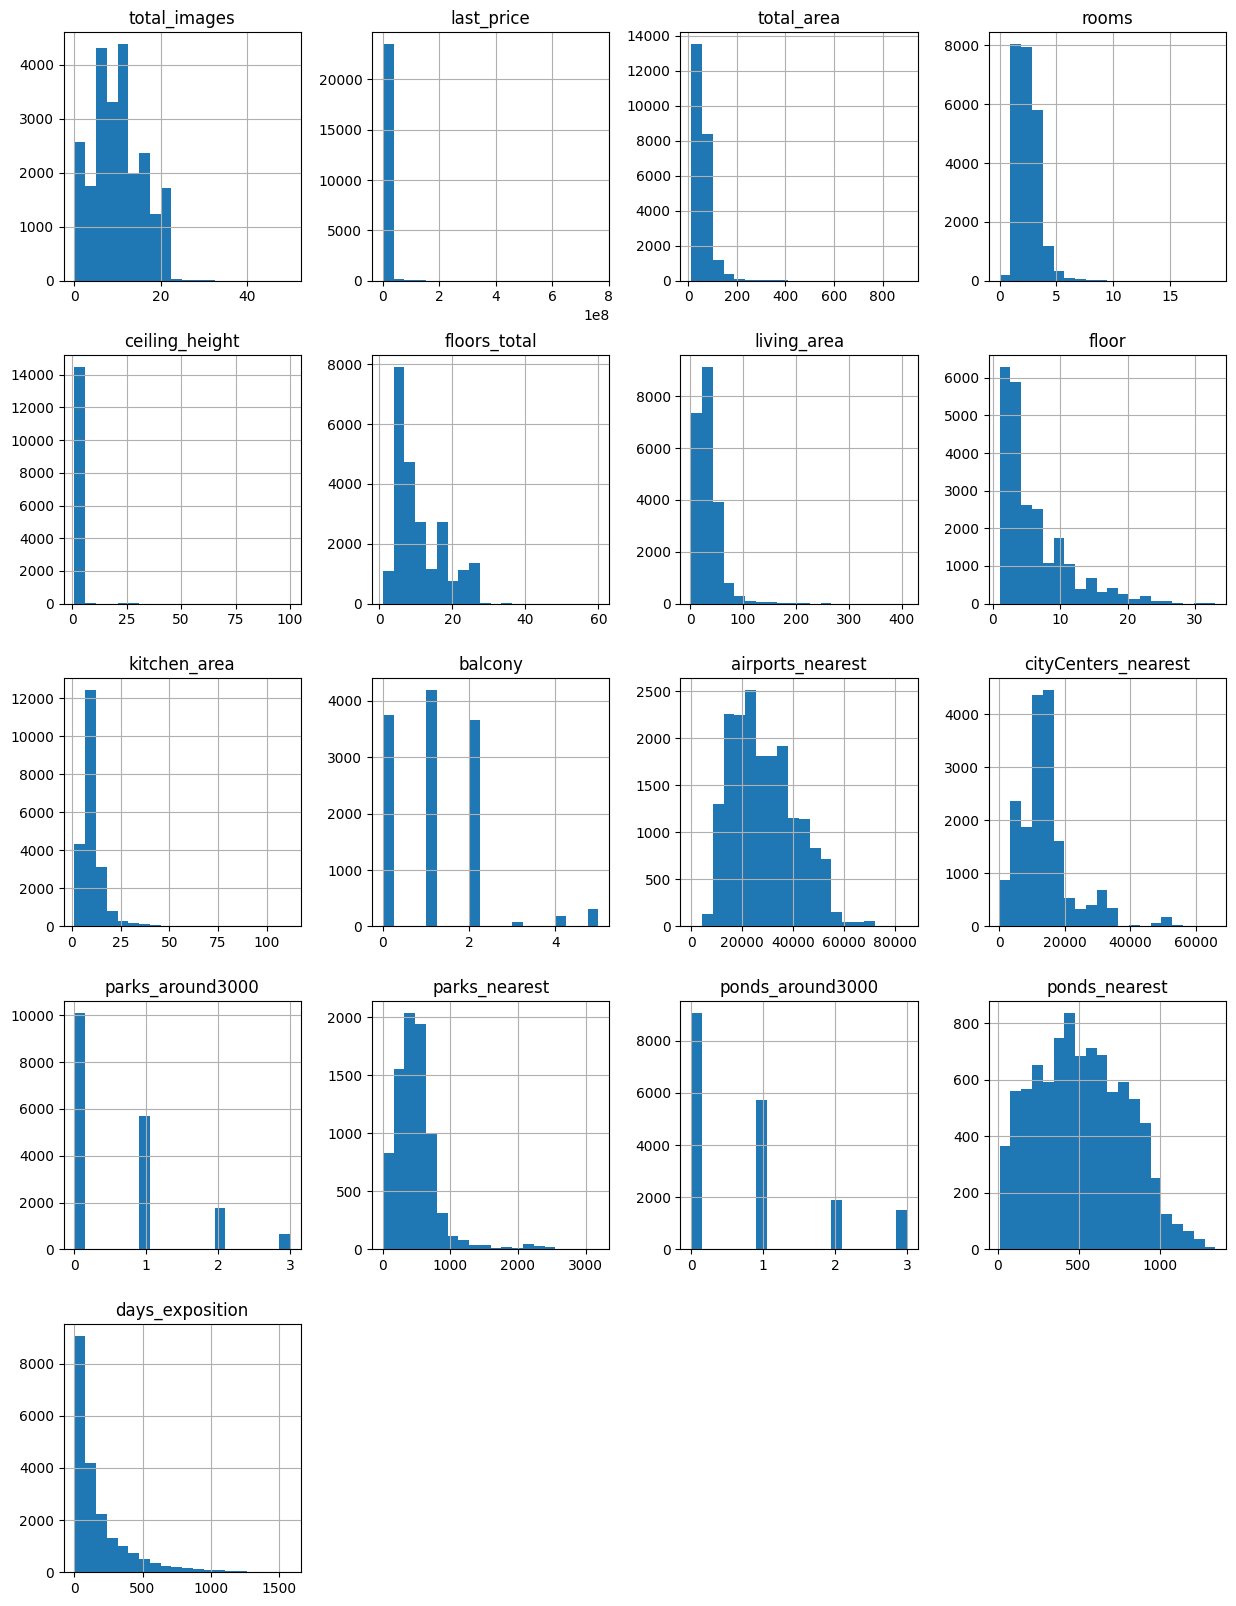

In [6]:
#Построим общую гистограмму для всех столбцов таблицы
df.hist(bins= 20, figsize=(15, 20))

По выведенной информации можно определить наличие пропусков  в таких столбцах как  ceiling_height, living_area, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. Нужно изучить эти столбцы подробнее выяснить почему могли возникнуть пропуски и заполнить их если это возможно подходящими значениями.
	В столбце balcony указанно количество балконов. Такие данные удобнее представлять в виде целого числа. Но в данных указан тип данных float.
В дальнейшем заменим его на int. Столбец is_apartment в датафрэйме имеет значения False и True. Таки данные относятся к типу bool. В нашем же случае указан тип object. Необходимо будет провести замену типа данных и в столбце is_apartment.         


# Шаг 2. Предобработка данных

## 2.1 Работа с пропусками

 Выведим количество пропущенных значений для каждого столбца. 

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Получили пропуски в следующих столбцах: 
ceiling_height — высота потолков (м)
floors_total — всего этажей в доме, 
living_area — жилая площадь в квадратных метрах (м²), 
is_apartment — апартаменты (булев тип), 
kitchen_area — площадь кухни в квадратных метрах (м²),
balcony — число балконов,
locality_name - название населённого пункта,
airports_nearest - расстояние до ближайшего аэропорта в метрах (м),
cityCenters_nearest - расстояние до центра города (м),
parks_around3000 - число парков в радиусе 3 км,
parks_nearest - расстояние до ближайшего парка (м),
ponds_around3000 - число водоёмов в радиусе 3 км,
ponds_nearest - расстояние до ближайшего водоёма (м),
days_exposition - сколько дней было размещено объявление (от публикации до снятия)
Рассмотрим пропуски в каждом столбце и попробуем выяснить почему они получились. 


Поиск артефактных значений

In [8]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Получив список значений столбца ceiling_height, можно увидеть значения которые явно вызывают сомнения. такие как 32. , 26. , и т.д. Высота потолка выше 5 метров и меньше 1.7 говорит о явной ошибки в данных. Потолки выше 20 меторов могут говорить об опечатке. Приведем их в соответсвие разделив на 10 (то есто потоло 27.5 метров приведем к виду 2.75)


In [9]:
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df['ceiling_height']/10


Потолки с высотой выше 5 метров, и ниже 2.0, тоже мало похожи на реальные значения.
Сделаем срез из таблицы с данными где высота потолка меньше 5 метров.
И посчитаем среднее значение. Округлим его до двух знаков после запятой.

In [10]:
ceiling_min = df.query('ceiling_height <= 5')
ceiling_median = ceiling_min['ceiling_height'].mean()
ceiling_median = ceiling_median.round(2)
ceiling_median

2.72

Значения высоты потолка больше 5 и меньше 2.0 метров заменим на среднее.


In [11]:
df.loc[df['ceiling_height'] > 5, 'ceiling_height'] = ceiling_median
df.loc[df['ceiling_height'] < 2.0, 'ceiling_height'] = ceiling_median
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Пропуски в столбце ceiling_height, возникли потому что автор объявления его просто не указал. Данные значения можно также заполнить средним значением. Применим метод isna().sum() к столбцу чтобы убедиться в отсутствии пропусков.

In [12]:
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_median)
df['ceiling_height'].isna().sum()


0

ИССЛЕДУЕМ ПРОПУСКИ И ЗНАЧАЕНИЯ  В СТОЛБЦЕ living_area - Жилая площадь.

Разберем пропуски в колонке жилая площадь. Жилая площадь – это суммарная величина жилых комнат, предназначенные для постоянного проживания людей. Это гостиная, спальня, детская, рабочий кабинет. Есть еще общая площадь квартиры - (total_area), в которую включаются жилая площадь и нежилая(санузел, коридор, кухня). Возможно пропуски могли появиться если квартира имеет свободную планоровку. 
   

In [13]:
#Посчитаем сколько объектов из тех у которых не указано значение жилой площади имеют свободную планировку.

df[df['living_area'].isna()]['open_plan'].value_counts()

False    1898
True        5
Name: open_plan, dtype: int64

Всего пять квартир имеют свободную планировку, тогда как 1898 не имеют. Значит пропуски это просто отсутсвие информации.

Расчитаем коэфициент отношения общей площади к жилой: Берем строки, где living_area непустые и для них находим среднее по total area. Это число делим на строки, где living_area непустые и для них находим среднее по living_area). Получаем коэффициент.

И пропущенные значения в living_area заполним: .fillna(столбец с общей площадью/коэффициент)

In [14]:
avg_total_live = df.loc[df['living_area'] != df['living_area'].isna()]['total_area'].mean()
avg_living = df.loc[df['living_area'] != df['living_area'].isna()]['living_area'].mean()
living_coeff = avg_total_live/avg_living

df['living_area'] = df['living_area'].fillna(df['total_area']/living_coeff)

Построим график зависимоти общей площади от жилой и изучим данные.

<AxesSubplot: xlabel='total_area', ylabel='living_area'>

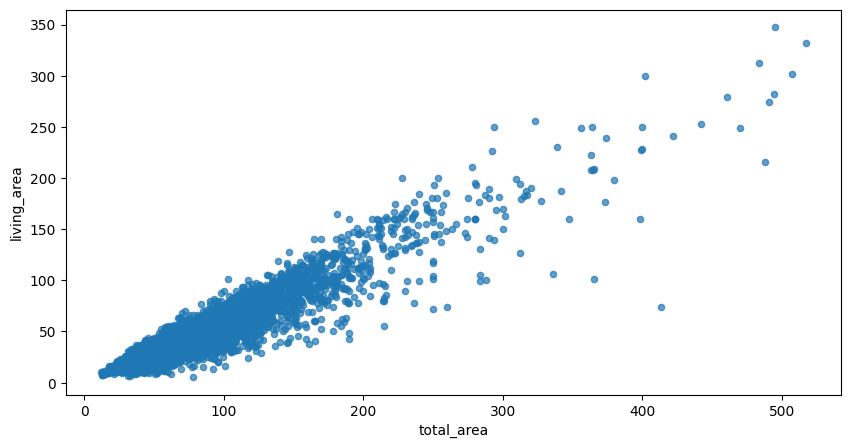

In [63]:
df.plot(x='total_area', y='living_area', kind='scatter', alpha=0.7, figsize=(10, 5))

Прослеживается прямая зависимоть, чем больше общая площадь тем больше жилая.  Можно сделать вывод что больше всего объектов с общей площадью  до 300 метров. На графике заметны объекты у которых при достаточной общей площади низкие значения жилой. 
Найдем эти аномалии, где жилая площадь менее 5 кв.м. и исключим их.

In [16]:
df = df[df.living_area > 5]


ИССЛЕДУЕМ ПРОПУСКИ В СТОЛБЦЕ floors_total

Выведем часть таблицы где пропущены значения в столбце floors_total. И посчитаем количество уникальных значений в колонке этаж.
Как видно это объекты которые находятся на разных этажах от 1 до 23. ОБъективную замену подобрать сложно так как квартира на 4 этаже может находиться и 5 этажном доме и в 24 этажном. Заменим пропуски на нули.

In [17]:
df[df['floors_total'].isna()]['floor'].value_counts()

4     10
6      9
8      8
12     6
9      5
21     4
5      4
7      4
3      4
19     3
11     3
13     3
1      3
18     3
15     3
10     3
24     2
2      2
20     2
14     2
22     1
17     1
23     1
Name: floor, dtype: int64

In [18]:
df['floors_total'] = df['floors_total'].fillna(0)

ИССЛЕДУЕМ ПРОПУСКИ В СТОЛБЦЕ is_apartment

In [19]:
#Посчитаем количство пропусков
df['is_apartment'].isna().sum()

20919

Из всех объектов в датафрэйме, 50 имеют значение- True,(то есть являются апартаментами); 2725 имеют значение -  False (не являются\ апартаментами. Остальные значения пропущены. Логично предположить, что данные объекты так же не являются апартаментами, так как значение отсутсвует. Заменим NaN  на False.  

In [20]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].value_counts()


False    23644
True        50
Name: is_apartment, dtype: int64

ИССЛЕДУЕМ ПРОПУСКИ В СТОЛБЦЕ kitchen_area.           

In [21]:
df[df['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.72,14.0,90.785766,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.72,9.0,18.728133,2,False,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,26.150869,1,False,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.72,22.0,22.839187,3,False,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.72,13.0,26.550554,13,False,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.600000,10,False,False,False,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,50.246210,1,False,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,26.036673,2,False,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,2.72,9.0,19.984288,4,False,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Расчитаем коэфициент отношения общей площади к площади кухни:
Берем строки, где kitchen_area непустые и для них находим среднее по total area. Это число делим на строки, где kitchen_area непустые и для них находим среднее по kitchen_area). Получаем коэффициент.

И пропущенные в kitchen_area  заполним: .fillna(столбец с общей площадью/коэффициент)

In [22]:
avg_total = df.loc[df['kitchen_area'] != df['kitchen_area'].isna()]['total_area'].mean()
avg_kitchen = df.loc[df['kitchen_area'] != df['kitchen_area'].isna()]['kitchen_area'].mean()
kitchen_coeff = avg_total/avg_kitchen
kitchen_coeff

5.709738877540035

In [23]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']/kitchen_coeff)

ИССЛЕДУЕМ ПРОПУСКИ В СТОЛБЦЕ balcony. 

Логично предположить что если в строке балкон стоит пропуск значит балкона нет. Заменим пропуски на нули.

In [24]:
df['balcony'] = df['balcony'].fillna(0)


Пропуски в столбцах:
locality_name              
•airports_nearest         
•cityCenters_nearest      
•parks_around3000
•parks_nearest        
•ponds_around3000       
•ponds_nearest        
оставим как есть, так как логичного заполнения предложить нет возможности, а если удалить их это может исказить данные. Скорее всего колонки должны заполняться атоматически например данными с яндекс карт, если они не заполнены значит данных нет.

## 2.2 Изучим уникальные значения в столбцах

Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов.

In [25]:
#Поменяем в названиях букву ё на е
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
# Поменям городской поселок на поселок городского типа
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [26]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

## 2.3 Замена типов данных

Поменяем тип данных в столбцах:
is_apartment на  bool
balcony на int
floors_total на int      



In [27]:
df['is_apartment'] = df['is_apartment'].astype('bool')
df['balcony'] = df['balcony'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23694 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23694 non-null  int64  
 1   last_price            23694 non-null  float64
 2   total_area            23694 non-null  float64
 3   first_day_exposition  23694 non-null  object 
 4   rooms                 23694 non-null  int64  
 5   ceiling_height        23694 non-null  float64
 6   floors_total          23694 non-null  int32  
 7   living_area           23694 non-null  float64
 8   floor                 23694 non-null  int64  
 9   is_apartment          23694 non-null  bool   
 10  studio                23694 non-null  bool   
 11  open_plan             23694 non-null  bool   
 12  kitchen_area          23694 non-null  float64
 13  balcony               23694 non-null  int32  
 14  locality_name         23645 non-null  object 
 15  airports_nearest   

## 2.4 Анализ аномальных значений

Ранее мы уже привели в соответствие аномальные значения в высоте потолка, привели их в соответствие, и данные по жилой площади, исключив объекты где она меньше 5 кв.м..

Проанализируем колонку rooms на наличие выбивающихся значений. 

In [28]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

Значения 0, и все что больше 15 явно походят на аномальные. исключим их.


In [29]:
df = df[(df.rooms > 0) & (df.rooms < 15)]

Исключим из анализа объекты с аномальной ценой. все что больше 150 млн. и меньше 1 млн..

In [30]:
df = df[(df.last_price > 1000000) & (df.last_price < 100000000)]

# Шаг 3. Добавление новых столбцов

Добавим в таблицу новый столбец price_one_m - цена одного квадратного метра;
Цену квартиры из столбца last_price разделим на общую площадь total_area. Результат округлим до 1 знака после запятой.

In [31]:
df['price_one_m'] = df['last_price']/df['total_area']
df['price_one_m'] = df['price_one_m'].round(1)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.72,11,18.600000,1,False,False,False,11.000000,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.72,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.72,14,90.785766,9,False,False,False,27.847158,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.300000,3,False,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.8
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.72,5,38.000000,4,False,False,False,8.500000,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.4
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.72,3,29.700000,1,False,False,False,9.930402,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.7
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17,43.822689,12,False,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.4


Создадим колонки:
• с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
• месяц публикации объявления;
• год публикации объявления;


In [32]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['day_of_week'] = df['first_day_exposition'].dt.weekday
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year


В зависимоти от того на каком этаже находится квартира разобьем на категории: тип этажа квартиры (значения — «первый», «последний», «другой») и запишем данные в столбец type_floor.

In [33]:
#Создадим колонку type_floor
df['type_floor'] = pd.Series()

In [34]:
#Заполним ее значениями по заданным условиям
for _ in df['floor']:
    df.loc[df['floor'] == 1, 'type_floor'] = 'первый'

for i in df['floor']:
    df.loc[(df['floor'] == i) & (df['floors_total'] == i), 'type_floor'] ='последний'



In [35]:
#Значения не первого и не последнего этажа запоним методом fillna()
df['type_floor'] = df['type_floor'].fillna('другой')


Создадим колонку centers_nearest_km  расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [36]:
df['centers_nearest_km'] = df['cityCenters_nearest']/1000
df['centers_nearest_km'] = df['centers_nearest_km'].round()

# Шаг 4.  Исследовательский анализ данных

### 4.1 Построим гистограмму для значений total_area - общая площадь. И опишем свои наблюдения

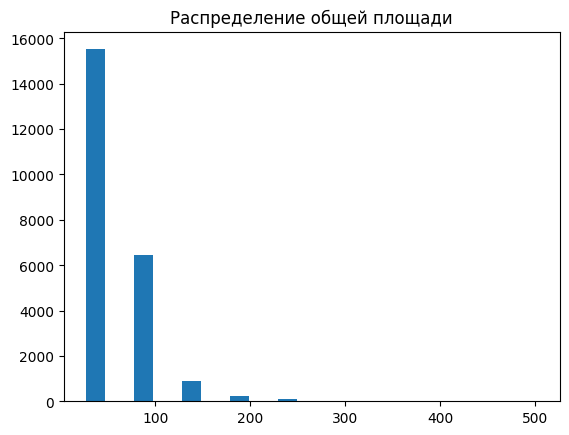

In [37]:

fig, ax = plt.subplots()
ax.hist(df['total_area'], bins = 10, rwidth=0.4)
ax.set_title('Распределение общей площади')
plt.show()

По гистограмме можно сделать вывод что больше всего объектов с площадью до 100. И можем наблюдать выбросы со значениями более 300 кв.м. Рассмотрим подробнее часть гистограммы с объектами до 250 кв.м.

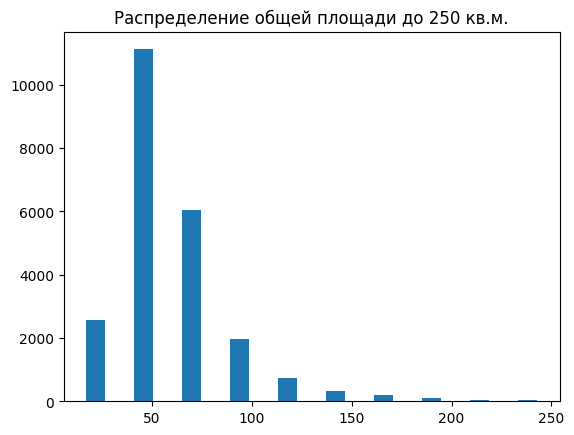

In [38]:
#Построим гистограмму для значений общая площадь до 250 кв.м.;
fig, ax = plt.subplots()
ax.hist(df['total_area'], bins = 10, range=(10, 250), rwidth=0.4)
ax.set_title('Распределение общей площади до 250 кв.м.')
plt.show()

По гистограмме можно сделать вывод что больше всего объектов с площадью до 100. И можем наблюдать выбросы со значениями более 300 кв.м.
Рассмотрим подробнее часть гистграммы с объектами до 250 кв.м.

В данном диапазоне большее количество объектов имеют площадь от 40 до 60 кв.м.

### 4.2 Построим гистограмму для значений living_area - жилая площадь. И опишем свои наблюдения.

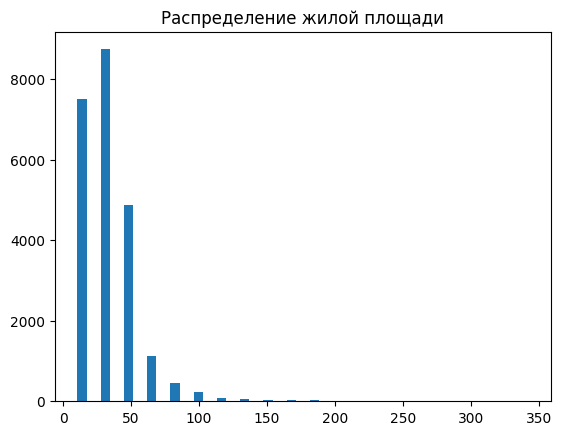

In [39]:
#Построим гистограмму для значений жилой площади;
fig, ax = plt.subplots()
ax.hist(df['living_area'], bins=20, rwidth=0.4)
ax.set_title('Распределение жилой площади')
plt.show()


Больше всего объектов с жилой площадью от 30 до 45 м. Значения более 200 м можно считать выбросами.

### 4.3 Построим гистограмму для значений kitchen_area - площадь кухни. И опишем свои наблюдения.

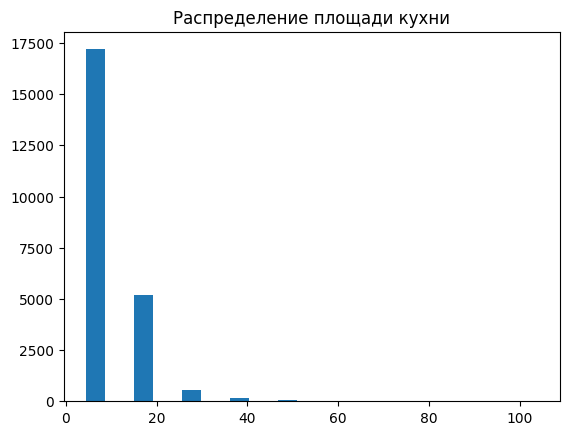

In [40]:
#Построим гистограмму для значений площадь кухни;
fig, ax = plt.subplots()
ax.hist(df['kitchen_area'], bins=10, rwidth=0.4)
ax.set_title('Распределение площади кухни')
plt.show()

Можно сделать вывод о том что объектов с площадью кухни от 7 до 13 м больше. Значения более 50 м можно считать выбросами.

### 4.4 Построим гистограмму для значений rooms - количество комнат. И опишем свои наблюдения.

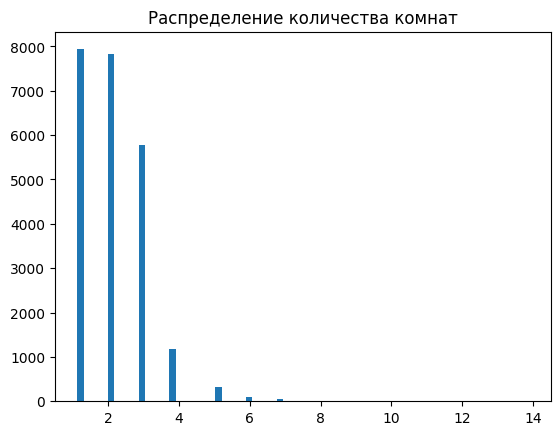

In [41]:
#Построим гистограмму для значений количество комнат;
fig, ax = plt.subplots()
ax.hist(df['rooms'], bins=30, rwidth=0.4)
ax.set_title('Распределение количества комнат')
plt.show()

Преобладают квартиры с числом комнат 1 и 2. Квартир с 3 комнатами тоже достаточно но меньше чем 1 и 2 комнатных.

### 4.5 Построим гистограмму для значений last_price - цена объектат. И опишем свои наблюдения.

In [42]:
# Разделим все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
df['last_price'] = df['last_price']/1000000

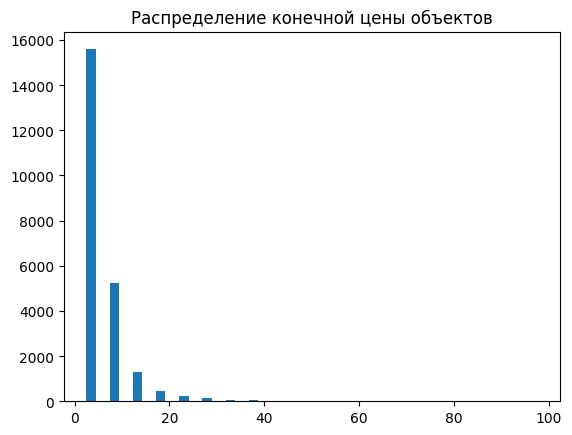

In [43]:
#Построим гистограмму для значений цена объекта;
fig, ax = plt.subplots()
ax.hist(df['last_price'], bins=20,  rwidth=0.4)
ax.set_title('Распределение конечной цены объектов')
plt.show()

### 4.6 Построим гистограмму для значений ceiling_height - высота потолков. И опишем свои наблюдения.

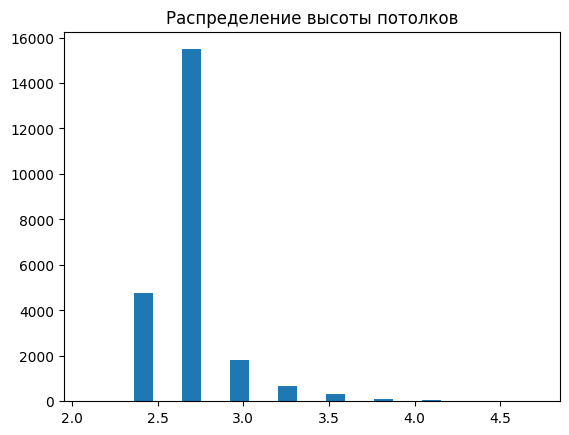

In [44]:
#Построим гистограмму для значений высота потолков;
fig, ax = plt.subplots()
ax.hist(df['ceiling_height'], bins=10, rwidth=0.4)
ax.set_title('Распределение высоты потолков')
plt.show()

Высота потолков в районе от 2.6 до 2.8 самая популярная

### 4.7 Построим гистограмму для значений floor - этаж квартиры. И опишем свои наблюдения.

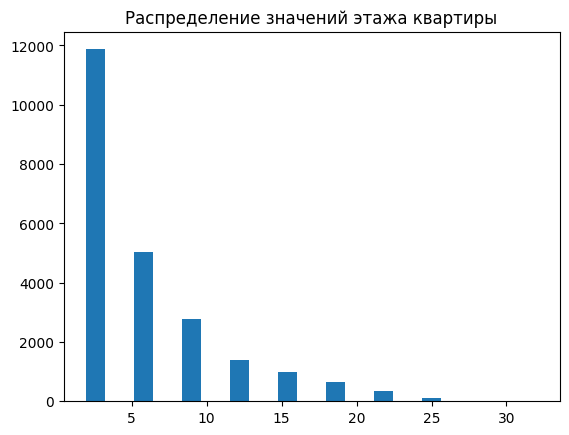

In [45]:
#Постороим Гистограмму по значению этажа квартиры;
fig, ax = plt.subplots()
ax.hist(df['floor'], bins=10, rwidth=0.4)
ax.set_title('Распределение значений этажа квартиры')
plt.show()

Больше всего объектов находится на этажах с 1 по 4

### 4.8 Построим гистограмму для значений type_floor - тип этажа квартиры. И опишем свои наблюдения.

<AxesSubplot: >

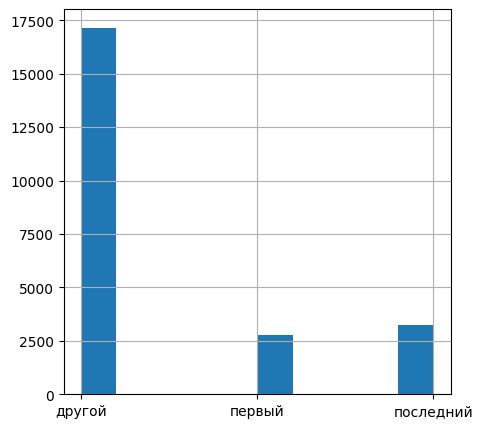

In [46]:
#Построим гистграмму по занчению тип этажа квартиры;
df.type_floor.hist(bins=10, figsize=(5,5))

Логично заметить что этажи первый и последний самые не популярные. Потому логически что их меньше  колличественно чем других, а так же потому что на первые этажах чаще всего сдают под какую либо предпринимательскую деятельность. 

### 4.9 Построим гистограмму для значений floors_total - количество этажей в доме. И опишем свои наблюдения.

<AxesSubplot: >

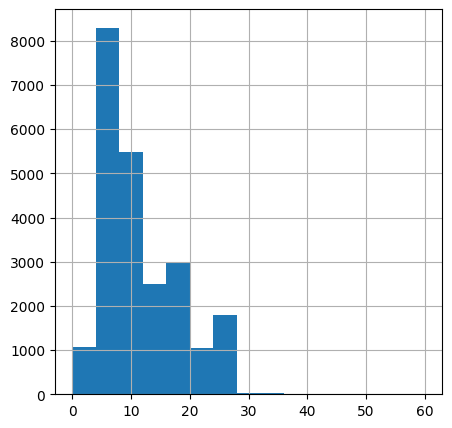

In [47]:
#Построим гистограмму по значению общее количество этажей в доме;
df.floors_total.hist(bins=15, figsize=(5,5))

Дома с этажностью 5 и 9 этажей самые распространенные. В то время как домов с количеством этажей больше 27 практически нет.

### 4.10 Построим гистограмму для значений cityCenters_nearest - расстояния до центра города. И опишем свои наблюдения.

<AxesSubplot: >

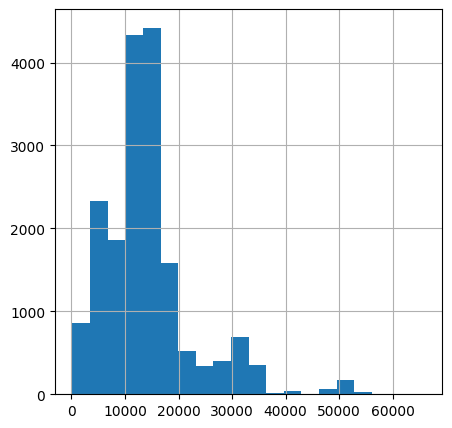

In [48]:
#Построим гистограмму по значению расстояния до центра города в метрах;
df.cityCenters_nearest.hist(bins=20, figsize=(5,5))

Большая часть квартир удалены от центра на расстояние от 10000 до 16000 м.

### 4.11 Построим гистограмму для значений airports_nearest - расстояния до ближайшего аэропорта. И опишем свои наблюдения.

<AxesSubplot: >

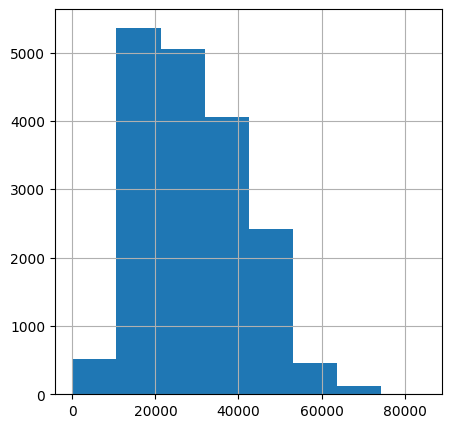

In [49]:
#Построим гистограмму по значению расстояния до ближайшего аэропорта;
df.airports_nearest.hist(bins=8, figsize=(5,5))

Основная масса объектов удалены от ближайшего аэропорта на расстоянии от 10000 до 30000 м.

### 4.12 Построим гистограмму для значений parks_nearest - расстояния до ближайшего парка. И опишем свои наблюдения.

<AxesSubplot: >

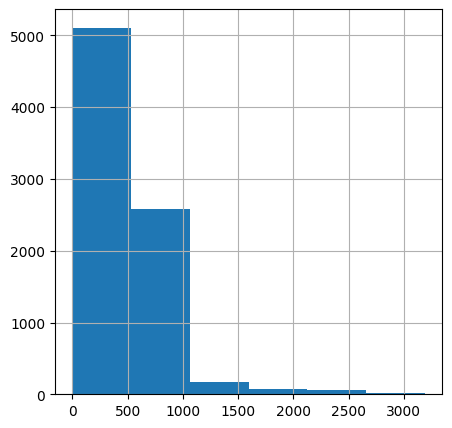

In [50]:
#Построим гистограмму по значению расстояния до ближайшего парка;
df.parks_nearest.hist(bins=6, figsize=(5,5))

Чаще всего ближайший парк распологается на расстоянии в 500 м, чуть реже на расстоянии в 1000 м.

### 4.13 Построим гистограмму для значений  значениюo day_of_week - день недели и month - месяц публикации объявления. И опишем свои наблюдения.

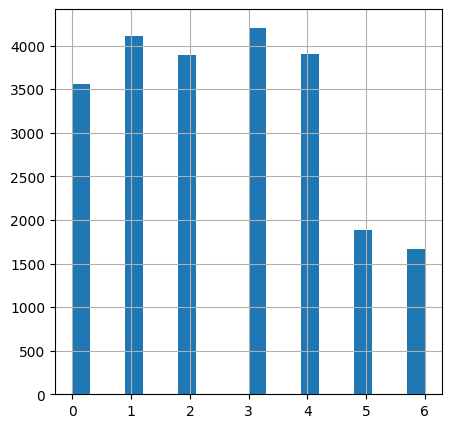

<AxesSubplot: >

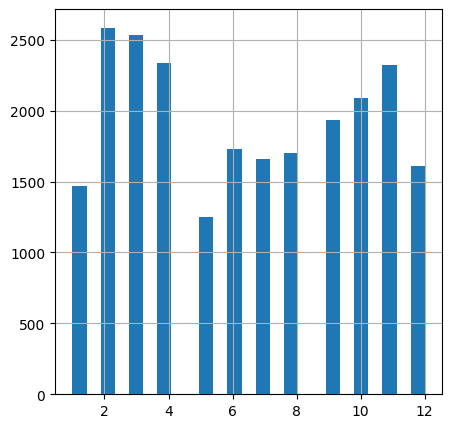

In [51]:
#Построим гистограмму по значениюo day_of_week - день недели и month - месяц публикации объявления.
df.day_of_week.hist(bins=20, figsize=(5,5))
plt.show()
df.month.hist(bins=25, figsize=(5,5))

По данным гистограммам можно сделать вывод, что в выходные дни реже всего подаются объявления о продажах квартир. А самые популярные месяцы для продажи февраль, март и апрель.

### 4.14 Изучим как быстро продавались квартиры.

<AxesSubplot: >

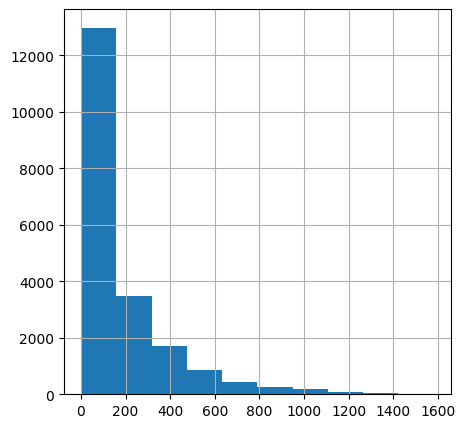

In [52]:
#Построим диаграмму по данным столбца days_exposition. 
df.days_exposition.hist(bins=10, figsize=(5,5))

In [53]:
df['days_exposition'].describe()

count    20104.000000
mean       181.467071
std        220.160154
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Чаще всего квартиры продавались в течении 190 дней. Средняя продолжительность продажи квартры 220 дней. Продажи ло 45 дней можно назвать быстрыми. А продажи длятельность более 1000 дней необычно долгими. 

### 4.15 Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Составим сводные таблицы

In [54]:
total_area_pivot = df.query('last_price < 20000000 and total_area < 300').pivot_table(index='total_area', values='last_price', aggfunc='median')

living_area_pivot = df.query('last_price < 20000000').pivot_table(index='living_area', values='last_price', aggfunc='median')

kitchen_area_pivot = df.query('last_price < 20000000').pivot_table(index='kitchen_area', values='last_price', aggfunc='median')

rooms_pivot = df.query('last_price < 20000000').pivot_table(index='rooms', values='last_price', aggfunc='median')
type_floor_pivot = df.query('last_price < 20000000').pivot_table(index='type_floor', values='last_price', aggfunc='median')

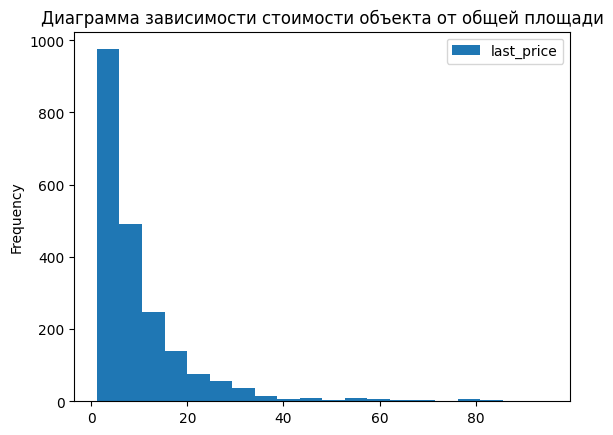

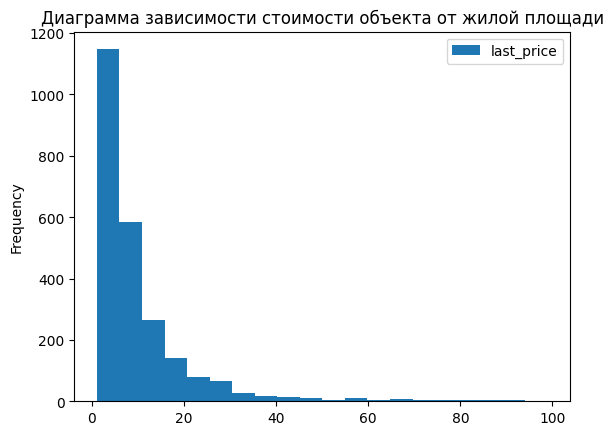

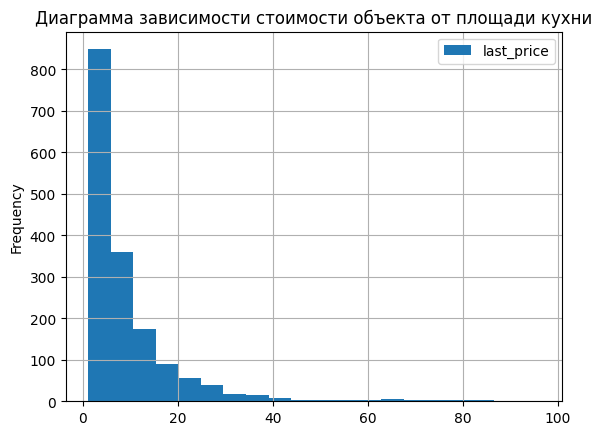

<AxesSubplot: title={'center': 'Диаграмма зависимости стоимости объекта от типа этажа'}, xlabel='type_floor'>

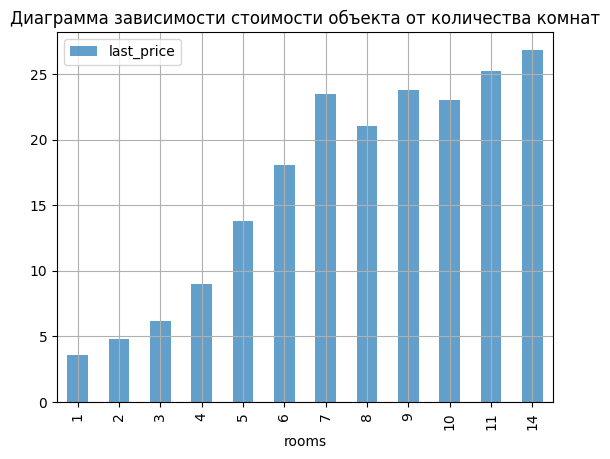

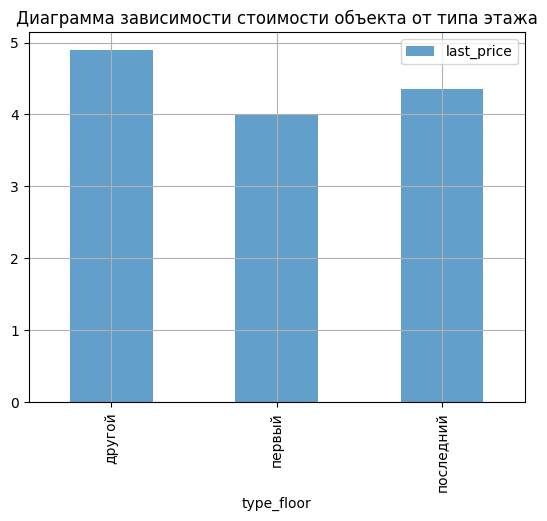

In [55]:
#Построим диаграмму зависимости стоимости объекта от общей площади.
total_area_pivot.plot(kind='hist', bins=20, title='Диаграмма зависимости стоимости объекта от общей площади')
plt.show()
living_area_pivot.plot(kind='hist', bins=20, title='Диаграмма зависимости стоимости объекта от жилой площади')
plt.show()
kitchen_area_pivot.plot(kind='hist',  bins=20, grid=True, title='Диаграмма зависимости стоимости объекта от площади кухни')
plt.show()
rooms_pivot.plot(kind='bar', alpha=0.7, grid=True, title='Диаграмма зависимости стоимости объекта от количества комнат')
type_floor_pivot.plot(kind='bar', alpha=0.7, grid=True, title='Диаграмма зависимости стоимости объекта от типа этажа')

Рост стоимости объекта связан с ростом его общей и жилой площади только для квартир в ценавом диапазоне от 1 млн до 4 млн. После надблюдантся обратная тенденция с уменьшение площади растет цена.
Тот же эффет наблюдаем при оценке влияния площади кухни на стоимость жилья.
При увеличении количества комнат стоимость жилья растет. Квартры на первых и последних этаж уступают в цене другим.

In [56]:
day_of_week_pivot = df.query('last_price < 20000000').pivot_table(index='day_of_week', values='last_price', aggfunc='median')
month_pivot = df.query('last_price < 20000000').pivot_table(index='month', values='last_price', aggfunc='median')
year_pivot = df.query('last_price < 20000000').pivot_table(index='year', values='last_price', aggfunc='median')

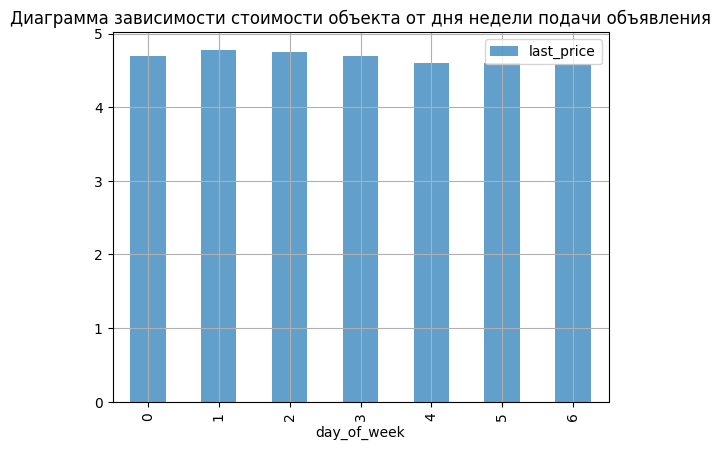

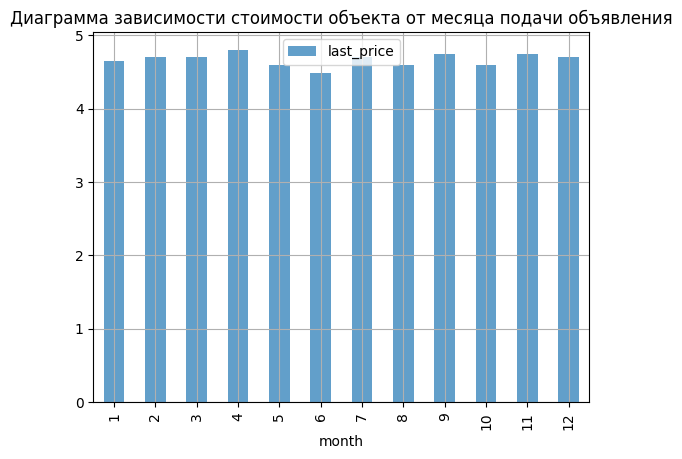

<AxesSubplot: title={'center': 'Диаграмма зависимости стоимости объекта от года подачи объявления'}, xlabel='year'>

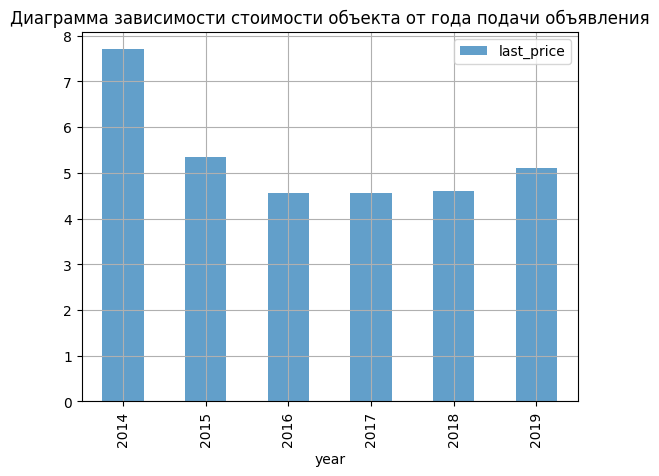

In [57]:
day_of_week_pivot.plot(kind='bar', alpha=0.7, grid=True, title='Диаграмма зависимости стоимости объекта от дня недели подачи объявления')
plt.show()
month_pivot.plot(kind='bar', alpha=0.7, grid=True, title='Диаграмма зависимости стоимости объекта от месяца подачи объявления')
plt.show()
year_pivot.plot(kind='bar', alpha=0.7, grid=True, title='Диаграмма зависимости стоимости объекта от года подачи объявления')

По данным графикам можно сделать вывод что ни день недели ни месяц подачи объявления, существенного влияния на цену не оказываю. Чего не скажешь про год подачи. Цена продажи квартир в 2014 году была выше потом начала постепенно падать, но в 2019 году наблюдаем снова рост.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [58]:
#Сгруппируем по колонке locality_name, посчитаем количество объявлений отсортируем, и выведем первые 10
top10 = df[['locality_name']].groupby(['locality_name'])['locality_name'] \
                             .count() \
                             .reset_index(name='cnt') \
                             .sort_values(['cnt'], ascending=False) \
                             .head(10)
#Создадаим список городов, сделаем срез по данным списка, и посчитаем 
lst = top10['locality_name'].to_list()
top_locality_name = df.query('locality_name == @lst')


Высчитаем среднее значение 1 кв.м. в каждом из этих 10 населенных пунктов и сохраним в переменной top_locality_name_avg . А затем определим минимальное значение запишем в переменную locality_name_avg_min, и маскимальное значение запишем в переменную locality_name_avg_max.

In [59]:
top_locality_name_avg = top_locality_name.groupby('locality_name')['price_one_m'].mean()
locality_name_avg_min = top_locality_name.groupby('locality_name')['price_one_m'].mean().min()
locality_name_avg_max = top_locality_name.groupby('locality_name')['price_one_m'].mean().max()
print(top_locality_name_avg)
print('Минимальное значение:', locality_name_avg_min)
print('Максимальное значение:', locality_name_avg_max)

locality_name
Всеволожск            68683.729668
Выборг                58685.666953
Гатчина               68935.195425
Колпино               75424.581953
Пушкин               103125.818157
Санкт-Петербург      113514.518456
деревня Кудрово       92297.217668
поселок Мурино        85004.057278
поселок Парголово     90289.780186
поселок Шушары        78405.737844
Name: price_one_m, dtype: float64
Минимальное значение: 58685.6669527897
Максимальное значение: 113514.51845570758


Самая высока средняя цена за 1 кв.м. в Санкт-Петербурге, сама низка средняя цена за кв.м. в городе Выборг.

Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

In [60]:
#Сделаем срез по locality_name == "Санкт-Петербург
locality_name_spb = df.query('locality_name == "Санкт-Петербург"')
#удалим те строки где в расстоянии до центра стоят пропуски
locality_name_spb = locality_name_spb.dropna(subset=['cityCenters_nearest'], inplace = False)
#Преодразуем столбец centers_nearest_km (расстояние до центра в км) в тип данных int, для
# удобства вычислений
locality_name_spb['centers_nearest_km'] = locality_name_spb['centers_nearest_km'].astype('int')
#Расчитаем среднюю цену для каждого километра
price_avg_one_m_spb = locality_name_spb['price_one_m'].mean()
locality_name_spb['price_avg_km'] = price_avg_one_m_spb / locality_name_spb['centers_nearest_km']
locality_name_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m,day_of_week,month,year,type_floor,centers_nearest_km,price_avg_km
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16,7084.924984
2,10,5.196,56.00,2015-08-20,2,2.72,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой,14,8097.057124
3,0,64.900,159.00,2015-07-24,3,2.72,14,90.785766,9,False,False,False,27.847158,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1,4,7,2015,другой,7,16194.114249
4,2,10.000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8,14169.849968
7,5,7.915,71.60,2019-04-18,2,2.72,24,40.882144,22,False,False,False,18.900000,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.7,3,4,2019,другой,12,9446.566645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3.550,35.30,2018-02-28,1,2.86,15,16.300000,4,False,False,False,9.100000,2,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,100566.6,2,2,2018,другой,16,7084.924984
23690,3,5.500,52.00,2018-07-19,2,2.72,5,31.000000,2,False,False,False,6.000000,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,105769.2,3,7,2018,другой,6,18893.133290
23691,11,9.470,72.90,2016-10-13,2,2.75,25,40.300000,7,False,False,False,10.600000,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129904.0,3,10,2016,другой,4,28339.699936
23694,9,9.700,133.81,2017-03-21,3,3.70,5,73.300000,3,False,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.8,1,3,2017,другой,4,28339.699936


Построим диаграмму для визуального анализа.

<AxesSubplot: xlabel='centers_nearest_km', ylabel='price_avg_km'>

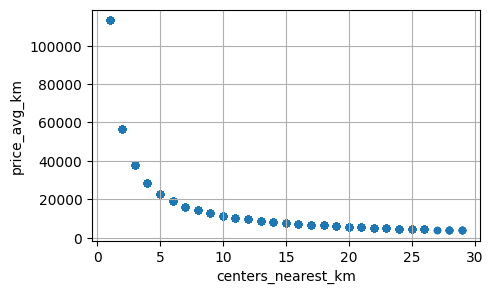

In [61]:
locality_name_spb.plot(x='centers_nearest_km', y='price_avg_km', kind='scatter', figsize=(5, 3), grid=True,)

Чем дальше от центра тем ниже цена.

# Общий вывод

Мы проводили исследование  данные сервиса Яндекс. Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
Предварительно изучив таблицу с данными были обнаружены некоторые проблемы. 
    Такие как : 
- наличие пропусков в таких столбцах как ceiling_height, living_area, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest;
- несоответсвие типов данных.
    После проведенной предоработки, пропущенные значение в таких колонках как ceiling_height, заменено на медианное,  living_area, kitchen_area были заменены на расчетные(с использованием коэффициентов). В колонки с названиями населенных пунков обработаны дубликатные значения , поменены буква ё на е и «городской поселок» на «поселок городского типа». Проанализированны и удалены аномальные значения в колонка rooms и last_price.
    Построили графики, которые показывают зависимость цены от 
o	общей площади;
o	жилой площади;
o	площади кухни;
o	количества комнат;
o	этажа, на котором расположена квартира (первый, последний, дру-гой);
o	даты размещения (день недели, месяц, год).


После проведенного анализа можно сделать вывод. Объявления о продажах чаще всего продаются в буднии дни. Покупаются квартиры чаще всего в феврале и марте. Средняя продолжительность продажи квартиры составляет 220 дней. Квартры на первых и последних этаж уступают в цене другим. После анализа даты подачи объявлений был сделан вывод, что ни день недели ни месяц подачи объявления, существенного влияния на цену не оказываю. Чего не скажешь про год подачи. Цена продажи квартир в 2014 году была выше потом начала постепенно падать, но в 2019 году наблюдаем снова рост. Число комнат так же влияет на стоимость квартиры. Чем комнат больше тем квартира дороже. при этом рост стоимости объекта связан с ростом его общей и жилой площади только для квартир в ценавом диапазоне от 1 млн до 4 млн. После надблюдантся обратная тенденция с уменьшение площади растет цена. Логично предположить что на стоимость этих квартир сказывается другой фактор. Проведенный анализ показал что этот фактор есть - Удаленность от центра. Он напрямую сказывается на стоимости жилья, чем дальше тем дешевле. Можно сделать небольшой общий вывод, что имея например 10 млн.ру, есть вариант купить большую просторную квартиру в пригороде Санкт-Петербурга, либо небольшой площади но неподалеку от центра.
